In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/data_2024-04-19T09-51-12.csv")

df.tail()


,timestamp,center_image,left_image,right_image,steering,throttle
38000,2024-04-19T09-47-39-645478,images/2024-04-19T09-47-39-620666_rgb_center.jpg,images/2024-04-19T09-47-39-645478_rgb_left.jpg,images/2024-04-19T09-47-39-627831_rgb_right.jpg,-0.000864,0.189818
38001,2024-04-19T09-47-39-698015,images/2024-04-19T09-47-39-691256_rgb_center.jpg,images/2024-04-19T09-47-39-704799_rgb_left.jpg,images/2024-04-19T09-47-39-698015_rgb_right.jpg,-0.000351,0.300124
38002,2024-04-19T09-47-39-742172,images/2024-04-19T09-47-39-724815_rgb_center.jpg,images/2024-04-19T09-47-39-738918_rgb_left.jpg,images/2024-04-19T09-47-39-732050_rgb_right.jpg,0.000871,0.339891
38003,2024-04-19T09-47-39-800309,images/2024-04-19T09-47-39-793190_rgb_center.jpg,images/2024-04-19T09-47-39-808096_rgb_left.jpg,images/2024-04-19T09-47-39-800309_rgb_right.jpg,0.000616,0.364215
38004,2024-04-19T09-47-39-846612,images/2024-04-19T09-47-39-828376_rgb_center.jpg,images/2024-04-19T09-47-39-843362_rgb_left.jpg,images/2024-04-19T09-47-39-835915_rgb_right.jpg,-0.000176,0.348939


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
steering,38005.0,-0.001948,0.073775,-0.8,-0.001407,0.000000,0.003407,0.80
throttle,38005.0,0.334328,0.211183,0.0,0.218774,0.373575,0.444148,0.85


<Axes: xlabel='steering', ylabel='Count'>

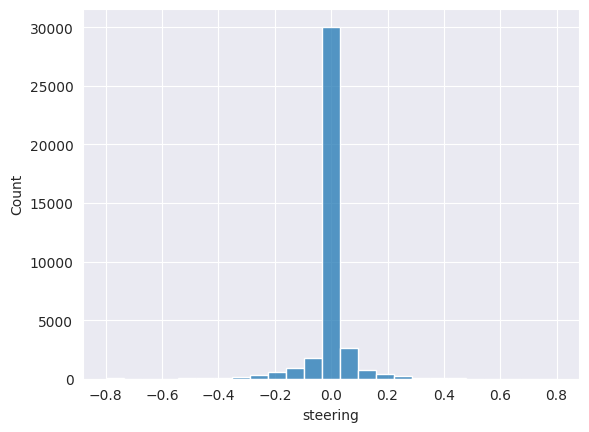

In [4]:
# draw a boxplot for the steering column
sns.histplot(df, x="steering", bins=25)

In [5]:
df["steering"].skew()

-1.5745451882255495

In [6]:
df_m = df[df["throttle"] != 0]
df_m["steering"].count()

31049

In [7]:
closed_to_zero = df_m[(df_m["steering"] >= -0.05) & (df_m["steering"] <= 0.05)]["steering"]
closed_to_zero.count()

25657

In [16]:
# reduce the number of examples close to zero from 29047 to 1500
df2 = df_m.drop(closed_to_zero.sample(frac=0.80).index)


In [17]:
df2["steering"].count()

10523

In [18]:
df2["steering"].skew()

-0.6924032488329144

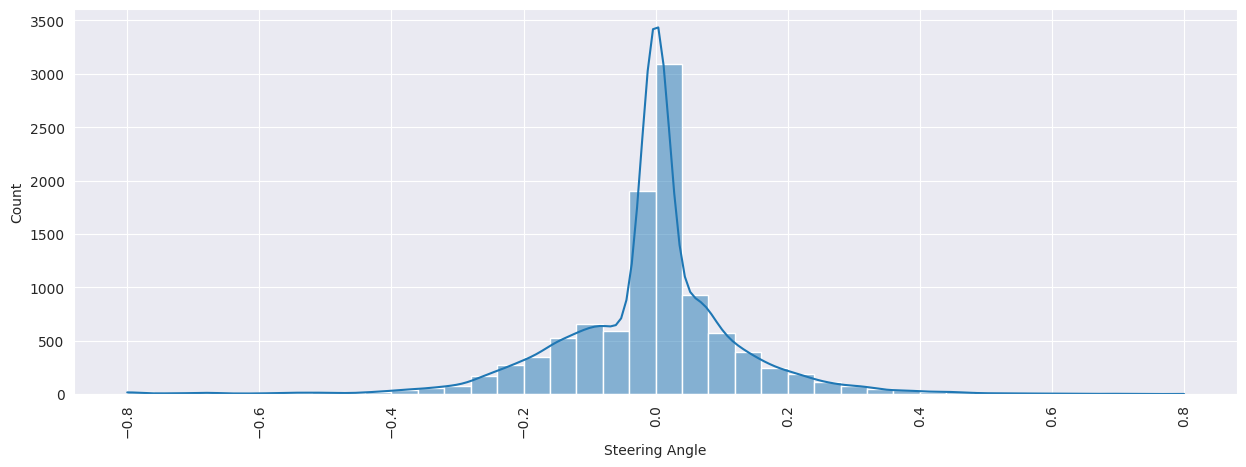

In [19]:
plt.figure(figsize=(15, 5))

# Put a vertical label to every of the 40 bins in vertical

sns.histplot(df2, x="steering", bins=40, kde=True)
plt.xlabel("Steering Angle")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Save df2, export the cleaned data ad a new csv file
df2.to_csv("datasets/data.csv", index=False, header=True, encoding="utf-8")

In [5]:
closed_to_01 = df[((df["steering"] >= -0.15) & (df["steering"] < -0.05)) | ((df["steering"] > 0.05) & (df["steering"] <= 0.15))]["steering"]
closed_to_01.count()

3343

In [6]:
closed_to_02 = df[((df["steering"] >= -0.25) & (df["steering"] < -0.15)) | ((df["steering"] > 0.15) & (df["steering"] <= 0.25))]["steering"]
closed_to_02.count()

3084

In [7]:
closed_to_03 = df[((df["steering"] >= -0.35) & (df["steering"] < -0.25)) | ((df["steering"] > 0.25) & (df["steering"] <= 0.35))]["steering"]
closed_to_03.count()

985

In [13]:
# reduce the number of examples
df3 = df.drop(closed_to_zero.sample(frac=0.9).index)
df3 = df3.drop(closed_to_01.sample(frac=0.90).index)
df3 = df3.drop(closed_to_02.sample(frac=0.95).index)
df3 = df3.drop(closed_to_03.sample(frac=0.95).index)

In [140]:
# round values from -0.05 to 0.05 to 0
df3.loc[(df3["steering"] >= -0.05) & (df3["steering"] <= 0.05), "steering"] = 0

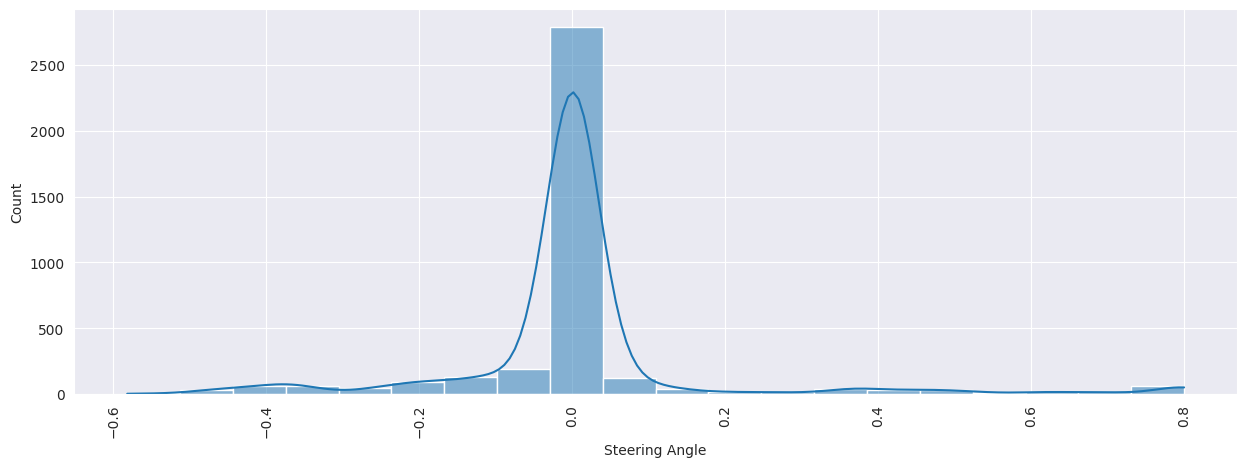

In [14]:
plt.figure(figsize=(15, 5))

# Put a vertical label to every of the 40 bins in vertical

sns.histplot(df3, x="steering", bins=20, kde=True)
plt.xlabel("Steering Angle")
plt.xticks(rotation=90)
plt.show()

In [15]:
df3["steering"].skew()

1.842603595931794

In [16]:
df3["steering"].count()

3798

In [17]:
# Export the cleaned data ad a new csv file
df3.to_csv("datasets/data.csv", index=False, header=True, encoding="utf-8")

In [18]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
steering,3798.0,0.006478,0.173216,-0.581881,-0.003787,0.0,0.003299,0.8
